In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Cleaning

In [63]:
data = pd.read_csv("merged_news.csv")

data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [64]:
# Convert Date column into Dates, this is because some of the data in the date column have shorten form

data['date'] = pd.to_datetime(data['date'], errors='coerce')  
# If they are improper dates, it will be NAT (Not a time)

In [65]:
na_date_rows = data[data['date'].isna()]

print(na_date_rows['date']) # Rows that do not have a published date.

9358    NaT
15507   NaT
15508   NaT
15839   NaT
15840   NaT
17432   NaT
17433   NaT
18933   NaT
21869   NaT
21870   NaT
Name: date, dtype: datetime64[ns]


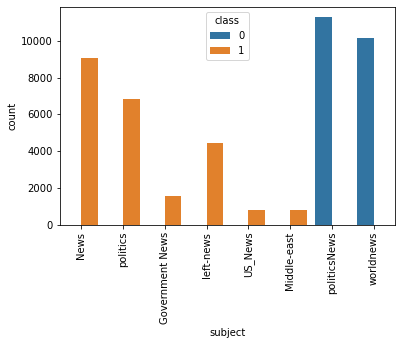

In [66]:


# We might have to clean the Subject column

sns.countplot(x='subject',hue='class',data=data) 
plt.xticks(rotation=90) 

plt.show() 
# From the chart, we can realize that each csv had their own way of categorizing the subject, 
# hence it might not be accurate in to re-label them, hence we would be dropping the subject

In [67]:
data.groupby(['subject','class']).count()

,,title,text,date
subject,class,,,
Government News,1,1570,1570,1568
Middle-east,1,778,778,778
News,1,9050,9050,9050
US_News,1,783,783,783
left-news,1,4459,4459,4456
politics,1,6841,6841,6836
politicsNews,0,11272,11272,11272
worldnews,0,10145,10145,10145


In [68]:
# Things to drop before creaeting a new csv

data = data.dropna()
data.drop(columns=['subject'])

,title,text,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,2017-12-25,1
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,2017-08-22,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",2017-08-22,0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,2017-08-22,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,2017-08-22,0


### Data Transformaton / Processing

In [69]:
# Create separate columns for date, month, year, and day of the week
data['date_ofmonth'] = data['date'].dt.strftime('%d')
data['month'] = data['date'].dt.strftime('%m')
data['year'] = data['date'].dt.strftime('%Y')
data['day_of_week'] = data['date'].dt.strftime('%A')
data['year_month'] = data['date'].dt.to_period('M')

#### NLTK Processing , Count words etc

In [70]:
# Write the newly cleaned dataframe in new file
data.to_csv("merged_cleaned.csv", index=False) # Final Dataset